# CNN - Retraining Image Data on Yearbook Images

In [ ]:
#CODE OBTAINED FROM TENSORFLOW TUTORIALS

In [ ]:
%load retrain.py

In [ ]:
%load retrain.py

In [2]:
# Visualize tensorboard
def TB(cleanup=False):
    import webbrowser
    webbrowser.open('http://localhost:6006')

    !tensorboard --logdir="logs"

    if cleanup:
        !rm -R logs/

Train models:

In [ ]:
%run retrain.py --tfhub_module https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/1 --how_many_training_steps=8000 --output_labels=./mobilenet_v1_8000/output_labels.txt --intermediate_output_graphs_dir=./mobilenet_v1_8000/intermediate_graph --output_graph=./mobilenet_v1_8000/output_graph.pb --image_dir=./yearbook_year --summaries_dir=./mobilenet_v1_8000/retrain_logs --bottleneck_dir=./bottleneck --saved_model_dir=./mobilenet_v1_8000

In [ ]:
%run retrain.py --tfhub_module https://tfhub.dev/google/imagenet/inception_v2/feature_vector/1 --how_many_training_steps=4000 --output_labels=./inception_v2_4000/output_labels.txt --intermediate_output_graphs_dir=./inception_v2_4000/intermediate_graph --output_graph=./inception_v2_4000/output_graph.pb --image_dir=./yearbook_year --summaries_dir=./inception_v2_4000/retrain_logs --bottleneck_dir=./bottleneck --saved_model_dir=./inception_v2_4000/saved_model

In [ ]:
%run retrain.py --tfhub_module https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/1 --how_many_training_steps=2000 --output_labels=./inception_v2_2000/output_labels.txt --intermediate_output_graphs_dir=./inception_v2_4000/intermediate_graph --output_graph=./inception_v2_2000/output_graph.pb --image_dir=./yearbook_year --summaries_dir=./inception_v2_2000/retrain_logs --bottleneck_dir=./bottleneck --saved_model_dir=./inception_v2_2000/saved_model

# Display Sample Images

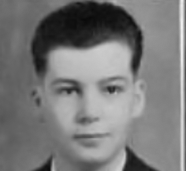

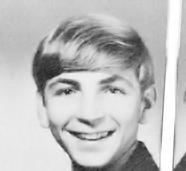

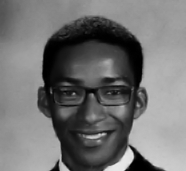

In [2]:
from IPython.display import Image
from IPython.display import display
import os

image1 = ('./final_test_images/1935_Washington_Mt-Vernon_Mt-Vernon_5-19.png')
image2 = ('./final_test_images/1970_Virginia_Arlington_Washington-Lee_29-8.png')
image3 = ('./final_test_images/2013_Virginia_Arlington_Washington-Lee_27-4.png')

display(Image(image1), Image(image2), Image(image3))

# Module: Inception_v2 w/8000 steps

In [2]:
%run label_image.py --graph=./inception_v2/output_graph.pb --labels=./inception_v2/output_labels.txt \
--input_layer=Placeholder --output_layer=final_result \
--image=./final_test_images/1935_Washington_Mt-Vernon_Mt-Vernon_5-19.png

1960 jpg 0.33056
1990 jpg 0.23351462
1950 jpg 0.1716316
1980 jpg 0.08566023
1970 jpg 0.084729634


In [3]:
%run label_image.py --graph=./inception_v2/output_graph.pb --labels=./inception_v2/output_labels.txt \
--input_layer=Placeholder --output_layer=final_result \
--image=./final_test_images/1970_Virginia_Arlington_Washington-Lee_29-8.png

1960 jpg 0.59563166
1950 jpg 0.14841127
1970 jpg 0.12617235
1980 jpg 0.10116503
1990 jpg 0.023061274


In [4]:
%run label_image.py --graph=./inception_v2/output_graph.pb --labels=./inception_v2/output_labels.txt \
--input_layer=Placeholder --output_layer=final_result \
--image=./final_test_images/2013_Virginia_Arlington_Washington-Lee_27-4.png

2010 jpg 0.59203255
1980 jpg 0.14676552
1950 jpg 0.07309552
1990 jpg 0.060814902
1960 jpg 0.046033684


In [ ]:
TB('./inception_v2/retrain_logs/')

2018-06-22 12:33:58.582919: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
TensorBoard 1.8.0 at http://airbears2-10-142-36-50.airbears2.1918.berkeley.edu:6006 (Press CTRL+C to quit)


# Model: MobileNet_v1 w/8000 steps 

In [ ]:
%run label_image.py --graph=./mobilenet_v1_8000/output_graph.pb --labels=./mobilenet_v1_8000/output_labels.txt \
--input_layer=Placeholder --output_layer=final_result \
--image=./final_test_images/1935_Washington_Mt-Vernon_Mt-Vernon_5-19.png --input_height=224 --input_width=224

In [ ]:
%run label_image.py --graph=./mobilenet_v1_8000/output_graph.pb --labels=./mobilenet_v1_8000/output_labels.txt \
--input_layer=Placeholder --output_layer=final_result \
--image=./final_test_images/1970_Virginia_Arlington_Washington-Lee_29-8.png --input_height=224 --input_width=224

In [ ]:
%run label_image.py --graph=./mobilenet_v1_8000/output_graph.pb --labels=./mobilenet_v1_8000/output_labels.txt \
--input_layer=Placeholder --output_layer=final_result \
--image=./final_test_images/2013_Virginia_Arlington_Washington-Lee_27-4.png --input_height=224 --input_width=224

In [ ]:
TB('./inception_v1_8000/retrain_logs/')

# Model: MobileNet_v1 w/2000 steps and parameter tuning

In [33]:
%run label_image.py --graph=./mobilenet_v1_2000/output_graph.pb --labels=./mobilenet_v1_2000/output_labels.txt \
--input_layer=Placeholder --output_layer=final_result \
--image=./final_test_images/1935_Washington_Mt-Vernon_Mt-Vernon_5-19.png --input_height=224 --input_width=224

1960 jpg 0.68082625
1950 jpg 0.17046858
1940 jpg 0.075522564
1970 jpg 0.044700846
1990 jpg 0.020423247


In [34]:
%run label_image.py --graph=./mobilenet_v1_2000/output_graph.pb --labels=./mobilenet_v1_2000/output_labels.txt \
--input_layer=Placeholder --output_layer=final_result \
--image=./final_test_images/1970_Virginia_Arlington_Washington-Lee_29-8.png --input_height=224 --input_width=224

1960 jpg 0.3827968
1970 jpg 0.31686112
1950 jpg 0.2645359
1980 jpg 0.030189134
1990 jpg 0.0025743986


In [35]:
%run label_image.py --graph=./mobilenet_v1_2000/output_graph.pb --labels=./mobilenet_v1_2000/output_labels.txt \
--input_layer=Placeholder --output_layer=final_result \
--image=./final_test_images/2013_Virginia_Arlington_Washington-Lee_27-4.png --input_height=224 --input_width=224

2010 jpg 0.83368266
1990 jpg 0.0416986
1960 jpg 0.032768134
2000 jpg 0.026851328
1910 jpg 0.024620984


In [ ]:
TB('./mobilenet_v1_2000/retrain_logs/')